In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from numpy import median

In [2]:
house_sales_df = pd.read_csv("house_sales.csv",encoding='utf-8')

In [6]:
house_sales_df['bedrooms'] = house_sales_df['bedrooms'].fillna(0)

In [8]:
y = house_sales_df.bedrooms
X = house_sales_df[['bathrooms','sqft_living']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()

In [9]:
house_sales_df['predict_bedrooms'] = round(lr_model.predict(X),0)

In [10]:
house_sales_df.loc[house_sales_df.bedrooms == 0 , 'bedrooms'] = house_sales_df['predict_bedrooms']

In [11]:
house_sales_df['bathrooms'] = house_sales_df['bathrooms'].fillna(0)

In [12]:
y = house_sales_df.bathrooms
X = house_sales_df[['bedrooms','sqft_living']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()

In [13]:
house_sales_df['predict_bathrooms'] = round(lr_model.predict(X),1)

In [14]:
house_sales_df.loc[(house_sales_df.predict_bathrooms - np.fix(house_sales_df.predict_bathrooms)) != 0.5 , 'predict_bathrooms'] = round(house_sales_df.predict_bathrooms,0)

In [15]:
house_sales_df.loc[house_sales_df.bathrooms == 0 , 'bathrooms'] = house_sales_df['predict_bathrooms']

In [16]:
house_sales_df.to_csv(r'house_sales_s1_mayel.csv', index=False, header=True)

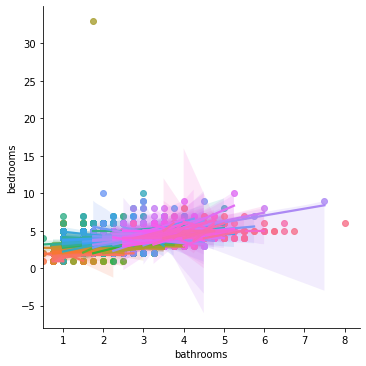

In [21]:
sns.lmplot(x="bathrooms",  y="bedrooms", hue="sqft_living", data=house_sales_df, legend=False)

In [23]:
corr = house_sales_df[['price','bedrooms','bathrooms','sqft_living','grade']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,bedrooms,bathrooms,sqft_living,grade
price,1.00,0.32,0.53,0.70,0.67
bedrooms,0.32,1.00,0.52,0.58,0.37
bathrooms,0.53,0.52,1.00,0.76,0.67
sqft_living,0.70,0.58,0.76,1.00,0.76
grade,0.67,0.37,0.67,0.76,1.00


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

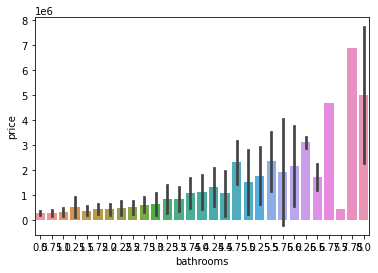

In [26]:
sns.barplot(x="bathrooms",y="price",data=house_sales_df, estimator=median, ci="sd")

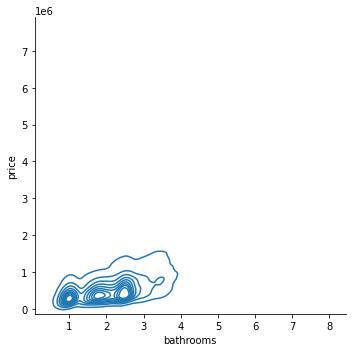

In [28]:
sns.displot(house_sales_df, x="bathrooms", y="price", kind="kde")

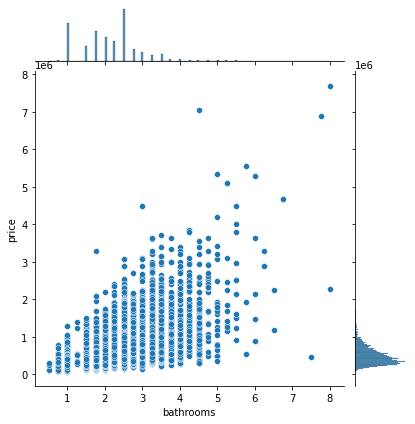

In [30]:
sns.jointplot(data=house_sales_df, x="bathrooms", y="price")

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

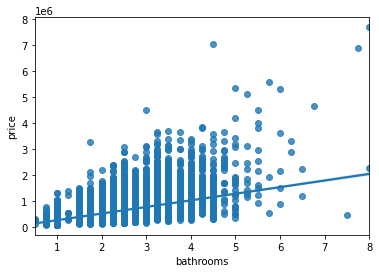

In [31]:
sns.regplot(x="bathrooms", y="price", data=house_sales_df)

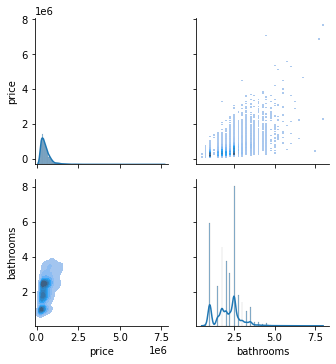

In [32]:
g = sns.PairGrid(house_sales_df[['price','bathrooms']])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot,fill=True)
g.map_diag(sns.histplot, kde=True)